In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
df = pd.read_csv("/content/dataset.csv", header = None);
df

,0,1,2
0,1.0,1.0,1.0
1,1.0,1.3,1.4
2,2.2,2.5,3.0
3,5.0,6.0,7.0
4,5.5,6.7,7.0
5,8.2,10.0,6.5
6,8.0,9.0,10.0
7,9.5,12.0,10.0
8,10.0,11.0,12.0
9,11.0,11.0,11.5


[[1.0, 1.0, 1.0], [1.0, 1.3, 1.4], [2.2, 2.5, 3.0], [5.0, 6.0, 7.0], [5.5, 6.7, 7.0], [8.2, 10.0, 6.5], [8.0, 9.0, 10.0], [9.5, 12.0, 10.0], [10.0, 11.0, 12.0], [11.0, 11.0, 11.5], [5.5, 6.5, 7.5], [2.0, 3.0, 4.0], [7.0, 8.0, 9.0], [3.0, 8.0, 4.0], [8.0, 2.0, 5.0]]


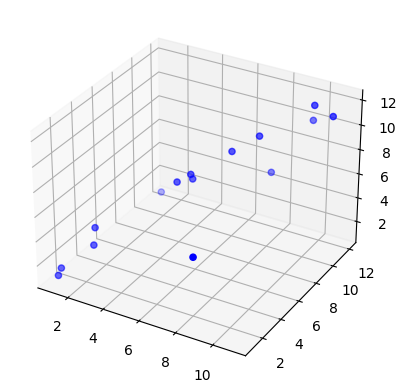

In [ ]:
X = df.values.tolist()
print(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[0], df[1], df[2],c='blue')

In [ ]:
import math

In [ ]:
def FindDistance(point,centroid):
  squared_distance = 0
  for i in range(len(point)):
    squared_distance += (point[i] - centroid[i]) ** 2
  distance = math.sqrt(squared_distance)
  return distance

In [ ]:
def ClusterAssignment(points,centroidList):
  k = len(centroidList)
  clusters = []
  for i in range(k) : clusters.append([])
  for curr_point in points:
    temp = []
    for curr_centroid in centroidList:
      curr_distance = FindDistance(curr_point, curr_centroid)
      temp.append(curr_distance)
    cluster_index = temp.index(min(temp))
    clusters[cluster_index].append(curr_point)
  return clusters

In [ ]:
def UpdateCentroid(clusters):
  centroids = []
  for cluster in clusters:
    centroid = [sum(coordinates) / len(cluster) for coordinates in zip(*cluster)]
    centroids.append(centroid)
  return centroids

In [ ]:
def check_with_prev(centroids1,centroids2):
  for centroid1, centroid2 in zip(centroids1, centroids2):
    if centroid1 != centroid2:
      return False
  return True

In [ ]:
def initial_centroid(points,k):
  centroids = random.sample(points, k)
  return centroids

In [ ]:
def kmeans(points, k):
  centroids = initial_centroid(points, k)
  while True:
    clusters = ClusterAssignment(points, centroids)
    new_centroids = UpdateCentroid(clusters)
    print("old centroids",centroids)
    print("new centroids",new_centroids)
    if check_with_prev(centroids, new_centroids):
      break
    centroids = new_centroids
    plotting(clusters, centroids)
  return clusters, centroids

In [ ]:
def plotting(clusters, centroids):
  colors = ['r', 'g', 'b', 'c', 'm', 'y','v']
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  for i in range(len(clusters)):
    cluster = clusters[i]
    color = colors[(i+1) % len(colors)]
    x = [point[0] for point in cluster]
    y = [point[1] for point in cluster]
    z = [point[2] for point in cluster]
    print('this is x',x)
    print('this is y',y)
    print('this is z',z)
    ax.scatter(x, y, z, c=color)


  x_centroids = [centroid[0] for centroid in centroids]
  y_centroids = [centroid[1] for centroid in centroids]
  z_centroids = [centroid[2] for centroid in centroids]
  ax.scatter(x_centroids,y_centroids,z_centroids,marker='x',c='r')

In [ ]:
k = int(input('Enter the number of clusters '))
k


Enter the number of clusters 3


3

old centroids [[1.0, 1.0, 1.0], [2.0, 3.0, 4.0], [10.0, 11.0, 12.0]]
new centroids [[1.0, 1.15, 1.2], [4.457142857142857, 4.957142857142857, 5.357142857142857], [8.950000000000001, 10.166666666666666, 9.833333333333334]]
this is x [1.0, 1.0]
this is y [1.0, 1.3]
this is z [1.0, 1.4]
this is x [2.2, 5.0, 5.5, 5.5, 2.0, 3.0, 8.0]
this is y [2.5, 6.0, 6.7, 6.5, 3.0, 8.0, 2.0]
this is z [3.0, 7.0, 7.0, 7.5, 4.0, 4.0, 5.0]
this is x [8.2, 8.0, 9.5, 10.0, 11.0, 7.0]
this is y [10.0, 9.0, 12.0, 11.0, 11.0, 8.0]
this is z [6.5, 10.0, 10.0, 12.0, 11.5, 9.0]
old centroids [[1.0, 1.15, 1.2], [4.457142857142857, 4.957142857142857, 5.357142857142857], [8.950000000000001, 10.166666666666666, 9.833333333333334]]
new centroids [[1.4000000000000001, 1.5999999999999999, 1.8], [4.833333333333333, 5.366666666666667, 5.75], [8.950000000000001, 10.166666666666666, 9.833333333333334]]
this is x [1.0, 1.0, 2.2]
this is y [1.0, 1.3, 2.5]
this is z [1.0, 1.4, 3.0]
this is x [5.0, 5.5, 5.5, 2.0, 3.0, 8.0]
this i

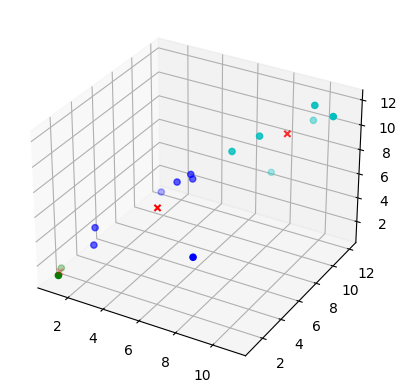

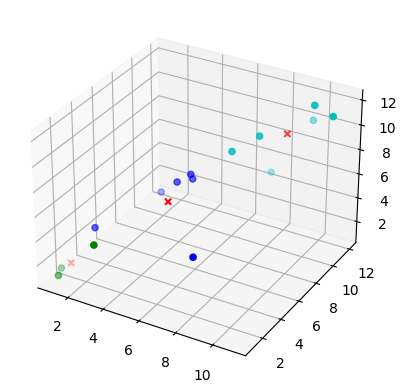

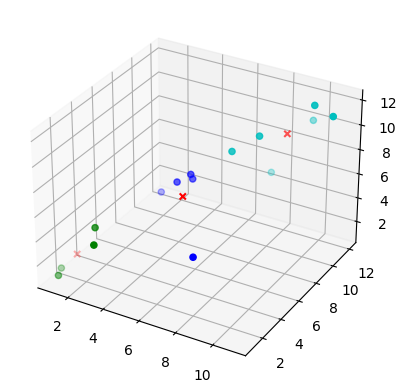

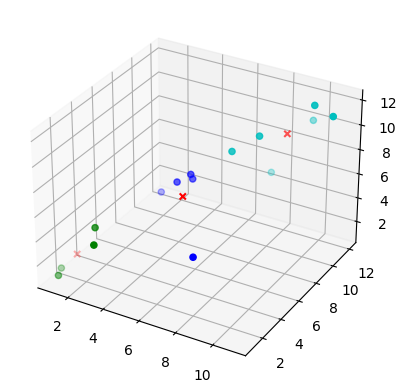

In [ ]:
clusters, centroids = kmeans(X, k)
plotting(clusters, centroids)

In [ ]:
def calculate_ssd(clusters, centroids):
    ssd = 0
    for i, cluster in enumerate(clusters):
        for point in cluster:
            ssd += FindDistance(point, centroids[i]) ** 2
    return ssd

# ... (Your existing code after clustering)

ssd = calculate_ssd(clusters, centroids)
print("Sum of Squared Distances (SSD):", ssd)


Sum of Squared Distances (SSD): 93.38366666666668


In [ ]:
def calculate_silhouette_score(clusters):
    silhouette_scores = []
    for cluster_idx, cluster in enumerate(clusters):
        for point in cluster:
            a = np.mean([FindDistance(point, other_point) for other_point in cluster if other_point != point])
            b = min([
                np.mean([FindDistance(point, other_point) for other_point in other_cluster])
                for other_cluster_idx, other_cluster in enumerate(clusters) if other_cluster_idx != cluster_idx
            ])
            s = (b - a) / max(a, b)
            silhouette_scores.append(s)
    avg_silhouette_score = np.mean(silhouette_scores)
    return avg_silhouette_score

# ... (Your existing code after clustering)

silhouette_score = calculate_silhouette_score(clusters)
print("Silhouette Score (Custom Calculation):", silhouette_score)


Silhouette Score (Custom Calculation): 0.4791614903733417
